# Python Pandas CheatSheet
<img src="../sample_files/logos/pandas.svg" width="400" />
The Pandas library is built  on NumPy and provieds easy-to-use data structures and data analysis tools for Python

In [73]:
import pandas as pd
import numpy as np

# Reshaping Data

### Pivot

In [74]:
data = { 'Date' : ['2016-03-01', '2016-03-02', '2016-03-01', '2016-03-03', '2016-03-02', '2016-03-03'],
         'Type' : ['a', 'b', 'c', 'a', 'a', 'c'],
         'Value': [11.432, 13.031, 20.784, 99.906, 1.303, 20.784]}
df2 = pd.DataFrame(data)
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


<img src="../sample_files/images/pandas_pivot.png" width="400" />

In [75]:
df3= df2.pivot(index='Date',    # Spread rows into columns
               columns='Type',
               values='Value')
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


### Pivot Table

In [76]:
df4 = pd.pivot_table(df2,             # Spread rows into columns
                     index='Type',
                     columns='Date',
                     values='Value')
df4

Date,2016-03-01,2016-03-02,2016-03-03
Type,,,
a,11.432,1.303,99.906
b,NaN,13.031,NaN
c,20.784,NaN,20.784


### Stack / Unstack

<img src="../sample_files/images/pandas_stack_unstack.png" width="300" />

In [77]:
arrays = [np.array([1,2,3]),
          np.array([5,4,3])]
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays)
df5

,,0,1
1,5,0.880460,0.049588
2,4,0.528833,0.085245
3,3,0.182555,0.918958


In [78]:
stacked = df5.stack() # Pivot a level of column labels
stacked

1  5  0    0.880460
      1    0.049588
2  4  0    0.528833
      1    0.085245
3  3  0    0.182555
      1    0.918958
dtype: float64

In [79]:
unstacked = stacked.unstack() # Pivot a level of index labels
unstacked

,,0,1
1,5,0.880460,0.049588
2,4,0.528833,0.085245
3,3,0.182555,0.918958


### Melt
<img src="../sample_files/images/pandas_melt.png" width="400" />

In [80]:
df6 = pd.melt(df2,                   # Gather columns into rows
        id_vars=["Date"],
        value_vars=["Type", "Value"],
        value_name="Observations")
df6

,Date,variable,Observations
0,2016-03-01,Type,a
1,2016-03-02,Type,b
2,2016-03-01,Type,c
3,2016-03-03,Type,a
4,2016-03-02,Type,a
5,2016-03-03,Type,c
6,2016-03-01,Value,11.432
7,2016-03-02,Value,13.031
8,2016-03-01,Value,20.784
9,2016-03-03,Value,99.906


## Iteration

In [81]:
for item in df2.iteritems(): # (Column-index, Series) pairs
  print(item)


('Date', 0    2016-03-01
1    2016-03-02
2    2016-03-01
3    2016-03-03
4    2016-03-02
5    2016-03-03
Name: Date, dtype: object)
('Type', 0    a
1    b
2    c
3    a
4    a
5    c
Name: Type, dtype: object)
('Value', 0    11.432
1    13.031
2    20.784
3    99.906
4     1.303
5    20.784
Name: Value, dtype: float64)


In [82]:
for row in df2.iterrows():  # (Row-index, Series) pairs
  print(row)

(0, Date     2016-03-01
Type              a
Value        11.432
Name: 0, dtype: object)
(1, Date     2016-03-02
Type              b
Value        13.031
Name: 1, dtype: object)
(2, Date     2016-03-01
Type              c
Value        20.784
Name: 2, dtype: object)
(3, Date     2016-03-03
Type              a
Value        99.906
Name: 3, dtype: object)
(4, Date     2016-03-02
Type              a
Value         1.303
Name: 4, dtype: object)
(5, Date     2016-03-03
Type              c
Value        20.784
Name: 5, dtype: object)


## Advanced Indexing

In [83]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])
print("s = \n{}".format(s))
data = {'Country': ['Belgium', 'India', 'Brazil'],
        'Capital': ['Brussels', 'New Delhi', 'Brasília'],
        'Population': [11190846, 1303171035, 207847528]}
df = pd.DataFrame(data,
                  columns=['Country', 'Capital', 'Population'])
print("df = \n{}".format(df))

data = {'second': [1,2,3,4],
        'first': [4,3,2,1]}
df6 = pd.DataFrame(data)
print("df6 = \n{}".format(df6))

s = 
a    3
b   -5
c    7
d    4
dtype: int64
df = 
   Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasília   207847528
df6 = 
   second  first
0       1      4
1       2      3
2       3      2
3       4      1


In [84]:
# Selecting
ans = df3.loc[:,(df3>1).any()]        # Select cols with any vals > 1
print("df3.loc[:,(df3>1).any()] = \n{}\n".format(ans))
ans = df3.loc[:,(df3>1).all()]        # Select cols with vals > 1
print("df3.loc[:,(df3>1).all()] = \n{}\n".format(ans))
ans = df3.loc[:,df3.isnull().any()]   # Select cols with NaN
print("df3.loc[:,df3.isnull().any()] = \n{}\n".format(ans))
ans = df3.loc[:,df3.notnull().all()]  # Select cols without NaN
print("df3.loc[:,df3.notnull().all()]] = \n{}\n".format(ans))

# Indexing With isin
ans = df[(df.Country.isin(df2.Type))] # Find same elements
print("df[(df.Country.isin(df2.Type))] = \n{}\n".format(ans))
ans = df3.filter(items=['a','b'])      # Filter on values
print("df3.filter(items=['a','b']) = \n{}\n".format(ans))
ans = df.select(lambda x: not x%5)    # Select specific elements
print("df.select(lambda x: not x%5) = \n{}\n".format(ans))

# Where
ans = s.where(s > 0)                  # Subset the data
print("s.where(s > 0) = \n{}\n",format(ans))

# Query
ans = df6.query('second > first')     # Query DataFrame
print("df6.query('second > first') = \n{}\n".format(ans))

df3.loc[:,(df3>1).any()] = 
Type             a       b       c
Date                              
2016-03-01  11.432     NaN  20.784
2016-03-02   1.303  13.031     NaN
2016-03-03  99.906     NaN  20.784

df3.loc[:,(df3>1).all()] = 
Type             a
Date              
2016-03-01  11.432
2016-03-02   1.303
2016-03-03  99.906

df3.loc[:,df3.isnull().any()] = 
Type             b       c
Date                      
2016-03-01     NaN  20.784
2016-03-02  13.031     NaN
2016-03-03     NaN  20.784

df3.loc[:,df3.notnull().all()]] = 
Type             a
Date              
2016-03-01  11.432
2016-03-02   1.303
2016-03-03  99.906

df[(df.Country.isin(df2.Type))] = 
Empty DataFrame
Columns: [Country, Capital, Population]
Index: []

df3.filter(items=['a','b']) = 
Type             a       b
Date                      
2016-03-01  11.432     NaN
2016-03-02   1.303  13.031
2016-03-03  99.906     NaN

df.select(lambda x: not x%5) = 
   Country   Capital  Population
0  Belgium  Brussels    11190846

s.wh

/home/zas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  app.launch_new_instance()


### Setting / Resetting Index

In [85]:
df.set_index('Country')    # Set the index
print("{}\n".format(df))
df5 = df.reset_index(
)     # Reset the index
print("{}\n".format(df5))
df6 = df.rename(index=str,  # Rename DataFrame
                columns={"Country":"cntry",
                "Capital":"cptl",
                "Population":"ppltn"})
print("{}\n".format(df6))

   Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasília   207847528

   index  Country    Capital  Population
0      0  Belgium   Brussels    11190846
1      1    India  New Delhi  1303171035
2      2   Brazil   Brasília   207847528

     cntry       cptl       ppltn
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasília   207847528



### Reindexing

In [86]:
s2 = s.reindex(['a','c','d','e','b'])
s2

a    3.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

In [87]:
# Forward filling
df.reindex(range(4), method='ffill')
print("{}\n".format(df))

# Backwards filling
s3 = s.reindex(range(5), method='bfill')
print("{}\n".format(s3))

   Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasília   207847528



TypeError: '>' not supported between instances of 'int' and 'str'

### Multiindexing

In [88]:
arrays = [np.array([1,2,3]),np.array([5,4,3])]
print("[np.array([1,2,3]),np.array([5,4,3])] = {}\n".format(arrays))
df5 = pd.DataFrame(np.random.rand(3, 2), index=arrays)
print("pd.DataFrame(np.random.rand(3, 2), index=arrays) = \n{}\n".format(df5))
tuples = list(zip(*arrays))
print("list(zip(*arrays)) = {}\n".format(tuples))
index = pd.MultiIndex.from_tuples(tuples,names=['first', 'second'])
print("pd.MultiIndex.from_tuples(tuples,names=['first', 'second']) = \n{}\n".format(index))
df6 = pd.DataFrame(np.random.rand(3, 2), index=index)
print("pd.DataFrame(np.random.rand(3, 2), index=index) = \n{}\n".format(df6))
df2.set_index(["Date", "Type"])
print("df2.set_index(['Date', 'Type']) =  \n{}\n".format(df2))

[np.array([1,2,3]),np.array([5,4,3])] = [array([1, 2, 3]), array([5, 4, 3])]

pd.DataFrame(np.random.rand(3, 2), index=arrays) = 
            0         1
1 5  0.229069  0.595972
2 4  0.759989  0.881983
3 3  0.675716  0.347306

list(zip(*arrays)) = [(1, 5), (2, 4), (3, 3)]

pd.MultiIndex.from_tuples(tuples,names=['first', 'second']) = 
MultiIndex(levels=[[1, 2, 3], [3, 4, 5]],
           labels=[[0, 1, 2], [2, 1, 0]],
           names=['first', 'second'])

pd.DataFrame(np.random.rand(3, 2), index=index) = 
                     0         1
first second                    
1     5       0.685946  0.258401
2     4       0.969433  0.113668
3     3       0.317478  0.944556

df2.set_index(['Date', 'Type']) =  
         Date Type   Value
0  2016-03-01    a  11.432
1  2016-03-02    b  13.031
2  2016-03-01    c  20.784
3  2016-03-03    a  99.906
4  2016-03-02    a   1.303
5  2016-03-03    c  20.784



## Duplicate Data

In [89]:
s.unique()                               # Return unique values
print("s.unique() = \n{}\n".format(s.unique()))
df2.duplicated('Type')                   # Check duplicates
print("df2.duplicated('Type') = \n{}\n".format(df2.duplicated('Type') ))
df2.drop_duplicates('Type', keep='last') # Drop duplicates
print("df2.drop_duplicates('Type', keep='last') = \n{}\n".format(df2.drop_duplicates('Type', keep='last')))
df.index.duplicated()                    # Check index duplicates
print("df.index.duplicated() = \n{}\n".format(df.index.duplicated()))

s.unique() = 
[ 3 -5  7  4]

df2.duplicated('Type') = 
0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

df2.drop_duplicates('Type', keep='last') = 
         Date Type   Value
1  2016-03-02    b  13.031
4  2016-03-02    a   1.303
5  2016-03-03    c  20.784

df.index.duplicated() = 
[False False False]



## Grouping Data

In [94]:
# Aggregation
df2.groupby(by=['Date','Type']).mean()
print("df2.groupby(by=['Date','Type']).mean() = \n{}\n".format(df2.groupby(by=['Date','Type']).mean()))
df4.groupby(level=0).sum()
print("df4.groupby(level=0).sum() = \n{}\n".format(df4.groupby(level=0).sum()))

# Transformation
customSum = lambda x: (x+x%2)
df4.groupby(level=0).transform(customSum)
print("customSum = lambda x: (x+x%2)")
print("df4.groupby(level=0).transform(customSum) = \n{}\n".format(df4.groupby(level=0).transform(customSum)))

df2.groupby(by=['Date','Type']).mean() = 
                  Value
Date       Type        
2016-03-01 a     11.432
           c     20.784
2016-03-02 a      1.303
           b     13.031
2016-03-03 a     99.906
           c     20.784

df4.groupby(level=0).sum() = 
Date  2016-03-01  2016-03-02  2016-03-03
Type                                    
a         11.432       1.303      99.906
b          0.000      13.031       0.000
c         20.784       0.000      20.784

customSum = lambda x: (x+x%2)
df4.groupby(level=0).transform(customSum) = 
Date  2016-03-01  2016-03-02  2016-03-03
Type                                    
a         12.864       2.606     101.812
b            NaN      14.062         NaN
c         21.568         NaN      21.568



## Missing Data

In [97]:
ans = df.dropna()            # Drop NaN values
print("df.dropna() = \n{}\n".format(ans))
ans = df3.fillna(df3.mean()) # Fill NaN values with a predetermined value
print("df3.fillna(df3.mean()) = \n{}\n".format(ans))
ans = df2.replace("a", "f")  # Replace values with others
print("df2.replace('a', 'f') = \n{}\n".format(ans))

df.dropna() = 
   Country    Capital  Population
0  Belgium   Brussels    11190846
1    India  New Delhi  1303171035
2   Brazil   Brasília   207847528

df3.fillna(df3.mean()) = 
Type             a       b       c
Date                              
2016-03-01  11.432  13.031  20.784
2016-03-02   1.303  13.031  20.784
2016-03-03  99.906  13.031  20.784

df2.replace('a', 'f') = 
         Date Type   Value
0  2016-03-01    f  11.432
1  2016-03-02    b  13.031
2  2016-03-01    c  20.784
3  2016-03-03    f  99.906
4  2016-03-02    f   1.303
5  2016-03-03    c  20.784



## Combininig Data

### Merge

In [105]:
data = {'X1': ['a','b','c'],
        'X2': [11.432, 1.303,  99.906]}
data1 = pd.DataFrame(data, columns=['X1', 'X2'])
data1

,X1,X2
0,a,11.432
1,b,1.303
2,c,99.906


In [106]:
data = {'X1': ['a','b','d'],
        'X3': [20.784, None, 20.784]}
data2 = pd.DataFrame(data, columns=['X1', 'X3'])
data2

,X1,X3
0,a,20.784
1,b,NaN
2,d,20.784


In [100]:
pd.merge(data1, data2, how='left', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN


In [101]:
pd.merge(data1, data2, how='right', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,d,NaN,20.784


In [102]:
pd.merge(data1, data2, how='inner', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN


In [103]:
pd.merge(data1, data2, how='outer', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


### Join

In [116]:
#data1.join(data2, on='X1', how='right')
pd.concat([data1,data2], sort = True)

,X1,X2,X3
0,a,11.432,NaN
1,b,1.303,NaN
2,c,99.906,NaN
0,a,NaN,20.784
1,b,NaN,NaN
2,d,NaN,20.784


 ### Concatenate

In [123]:
# Vertical
ans = s.append(s2)
print("s.append(s2) = \n{}\n".format(ans))
# Horizontal/Vertical
ans = pd.concat([s,s2],axis=1, keys=['One','Two'], sort=False)
print("pd.concat([s,s2],axis=1, keys=['One','Two']) = \n{}\n".format(ans))
ans = pd.concat([data1, data2], axis=1, join='inner', sort=False)
print("pd.concat([data1, data2], axis=1, join='inner') = \n{}\n".format(ans))

s.append(s2) = 
a    3.0
b   -5.0
c    7.0
d    4.0
a    3.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

pd.concat([s,s2],axis=1, keys=['One','Two']) = 
   One  Two
a  3.0  3.0
b -5.0 -5.0
c  7.0  7.0
d  4.0  4.0
e  NaN  NaN

pd.concat([data1, data2], axis=1, join='inner') = 
  X1      X2 X1      X3
0  a  11.432  a  20.784
1  b   1.303  b     NaN
2  c  99.906  d  20.784



## Dates

In [ ]:
df2['Date']= pd.to_datetime(df2['Date'])
df2['Date']= pd.date_range('2000-1-1',periods=6,freq='M')
dates = [datetime(2012,5,1), datetime(2012,5,2)]
index = pd.DatetimeIndex(dates)
index = pd.date_range(datetime(2012,2,1), end, freq='BM')

## Visualization

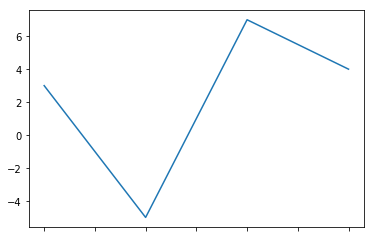

In [120]:
import matplotlib.pyplot as plt
s.plot()
plt.show()

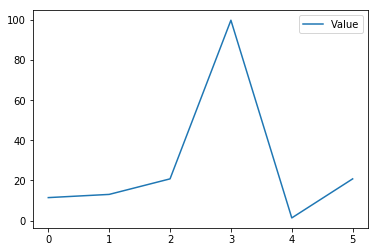

In [119]:
df2.plot()
plt.show()